### import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE

ModuleNotFoundError: No module named 'numpy'

### read data

Các từ viết tắt:
-ALB: lượng albumin trong máu bệnh nhân
-ALP: lượng phosphatase kiềm trong máu bệnh nhân
-ALT: lượng alanin transaminase trong máu bệnh nhân
-AST: lượng aspartate aminotransferase trong máu bệnh nhân
-BIL: lượng bilirubin trong máu của bệnh nhân
-CHE: lượng cholinesterase trong máu của bệnh nhân
-CHOL: lượng cholesterol trong máu bệnh nhân
-CREA: lượng creatine trong máu của bệnh nhân
-GGT: lượng gamma-glutamyl transferase trong máu bệnh nhân
-PROT: lượng protien trong máu của bệnh nhân

Hepatitis C: Viêm gan C
Fibrosis: Xơ hóa gan
Cirrhosis: Xơ gan.

In [3]:
data = pd.read_csv("hcvdat.csv")
data

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [ ]:
data.info()

In [ ]:
data.describe()

In [ ]:
data.isnull().sum()

### handling missing value

In [3]:
data['Category'].replace(['0=Blood Donor','0s=suspect Blood Donor','1=Hepatitis','2=Fibrosis','3=Cirrhosis'], [0,1,2,3,4],inplace=True)
data.drop(['Unnamed: 0','Sex'], axis=1, inplace=True)

In [4]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values=np.nan, strategy='mean')
data.iloc[:,2:]=si.fit_transform(data.iloc[:,2:])

### data visualization

In [ ]:
sns.pairplot(data,hue='Category',kind='scatter')

### data scaling

In [5]:
X = data.drop(columns='Category', axis=1)
y = data['Category']

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
pd.DataFrame(X)

### train-test split

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

<AxesSubplot:ylabel='Category'>

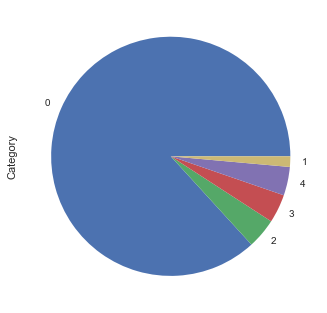

In [31]:
plt.style.use("seaborn")
y_train.value_counts().plot.pie()

#### balance processing

In [32]:
sm = SMOTE(random_state=1)

In [33]:
X_train, y_train = sm.fit_resample(X_train, y_train)

In [ ]:
print('y test values:\n',y_train.value_counts())

<AxesSubplot:ylabel='Category'>

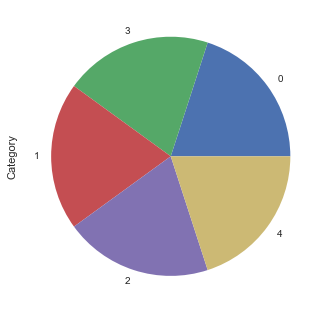

In [34]:
y_train.value_counts().plot.pie()

In [ ]:
print(y_train.count())

### Prediction

#### 1. Logistic regression

In [ ]:
lr = LogisticRegression(random_state=1,multi_class='ovr')
lr.fit(X_train, y_train)
prediction = lr.predict(X_test)

acc_lr=accuracy_score(y_test, prediction)
precision_lr=precision_score(y_test, prediction, average='macro')
recall_lr=recall_score(y_test, prediction, average='macro')
f1_lr=f1_score(y_test, prediction, average='macro')
cm_lr=confusion_matrix(y_test,prediction)

print('accuracy:', acc_lr)
print('precision:', precision_lr)
print('recall:', recall_lr)
print('f1:', f1_lr)
print(cm_lr)

#### 2. K-NN

In [ ]:
def k_max():
    k = 0
    max=0
    for i in range(1,30):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train, y_train)
        prediction = knn.predict(X_test)
        if max < accuracy_score(y_test, prediction):
            max = accuracy_score(y_test, prediction)
            k = i
    return k

knn = KNeighborsClassifier(n_neighbors=k_max())
knn.fit(X_train, y_train)

acc_knn=accuracy_score(y_test,knn.predict(X_test))
precision_knn=precision_score(y_test, prediction, average='macro')
recall_knn=recall_score(y_test, prediction, average='macro')
f1_knn=f1_score(y_test, prediction, average='macro')
cm_knn=confusion_matrix(y_test,prediction)

print('k=',k_max())
print('accuracy:', acc_knn)
print('precision:', precision_knn)
print('recall:', recall_knn)
print('f1:', f1_knn)
print(cm_knn)

#### 3. SVM

In [ ]:
svm=SVC()
svm_ovr=OneVsRestClassifier(svm)
svm_ovr.fit(X_train,y_train)
prediction=svm_ovr.predict(X_test)

acc_svm=accuracy_score(y_test, prediction)
precision_svm=precision_score(y_test, prediction, average='macro')
recall_svm=precision_score(y_test, prediction, average='macro')
f1_svm=precision_score(y_test, prediction, average='macro')
cm_svm=confusion_matrix(y_test,prediction)

print('accuracy:', acc_svm)
print('precision:', precision_svm)
print('recall:', recall_svm)
print('f1:', f1_svm)
print(cm_svm)

#### 4. Naive Bayes

In [ ]:
gnb=GaussianNB()
gnb.fit(X_train, y_train)
prediction=gnb.predict(X_test)

acc_gnb=accuracy_score(y_test, prediction)
precision_gnb=precision_score(y_test, prediction, average='macro')
recall_gnb=recall_score(y_test, prediction, average='macro')
f1_gnb=f1_score(y_test, prediction, average='macro')
cm_gnb=confusion_matrix(y_test,prediction)

print('accuracy:', acc_gnb)
print('precision:', precision_gnb)
print('recall:', recall_gnb)
print('f1:', f1_gnb)
print(cm_gnb)

#### 5. Decision Tree

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
prediction = dtc.predict(X_test)
acc_dtc=accuracy_score(y_test, prediction)
precision_dtc=precision_score(y_test, prediction, average='macro')
recall_dtc=recall_score(y_test, prediction, average='macro')
f1_dtc=f1_score(y_test, prediction, average='macro')
cm_dtc=confusion_matrix(y_test,prediction)

print('accuracy:', acc_dtc)
print('precision:', precision_dtc)
print('recall:', recall_dtc)
print('f1:', f1_dtc)
print(cm_dtc)

#### 6. Random Forest

In [ ]:
rfc=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=1)
rfc.fit(X_train,y_train)
prediction = rfc.predict(X_test)
acc_rfc=accuracy_score(y_test, prediction)
precision_rfc=precision_score(y_test, prediction, average='macro')
recall_rfc=recall_score(y_test, prediction, average='macro')
f1_rfc=f1_score(y_test, prediction, average='macro')
cm_rfc=confusion_matrix(y_test,prediction)

print('accuracy:', acc_rfc)
print('precision:', precision_rfc)
print('recall:', recall_rfc)
print('f1:', f1_rfc)
print(cm_rfc)

#### comparing model

In [ ]:
def evaluate(y_test, y_pred):
    acc=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred, average='macro')
    recall=recall_score(y_test,y_pred, average='macro')
    f1=f1_score(y_test,y_pred, average='macro')
    return {'accuracy':acc,'precision':precision,'recall':recall,'f1':f1}

In [ ]:
models=[lr,knn,svm_ovr,gnb,dtc,rfc]
acc_values=[acc_lr,acc_knn,acc_svm,acc_gnb,acc_dtc,acc_rfc]
columns=['accuracy','precision','recall','f1']
index=['Logistic Regression','k-NN','SVM','Gaussian Naive Bayes','Decision Tree','Random Forest']
values=[]
for model in models:
    values.append(evaluate(y_test,model.predict(X_test)))

In [ ]:
compare_dataframe=pd.DataFrame(columns=columns, index=index,data=values)
compare_dataframe.T

#### compare accuracy

In [ ]:
fix,ax=plt.subplots(figsize=(10,5))
sns.barplot(x=index,y=acc_values,color='blue')
plt.ylabel('Model accuracy')
plt.xticks(rotation=-40)
plt.show()